# House Prices Prediction

## Importing:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# get_description() is a function to get the description of any column name or a value.
# It takes the column/value name, or any list of them:
from data_description import get_description

%matplotlib inline
sns.set_style('darkgrid')

### Importing the 'clean_dataset.csv' file:

In [2]:
clean_data = pd.read_csv('data/clean_dataset.csv', index_col=0).drop(columns=['Id'])
clean_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,No_MiscFeature,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,No_Alley,Reg,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,No_MiscFeature,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,No_Alley,IR1,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,No_MiscFeature,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,...,0,No_Pool,No_Fence,No_MiscFeature,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,No_Alley,IR1,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,No_MiscFeature,0,12,2008,WD,Normal,250000.0


## Feature engineering:

#### NOTE: All feature engineering should be done clean_data as a whole. Because. train and test data are obtained by splitting after the feature engineering is finished.

In [915]:
data = clean_data.copy()

In [916]:
data['MSSubClass'] = data['MSSubClass'].astype(str)

In [917]:
data['MoSold'] = data['MoSold'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  

In [918]:
data['HouseAge'] = data['YrSold'] - data['YearBuilt']

In [919]:
data['LastRemodeled'] = data['YrSold'] - data['YearRemodAdd']
data['IsRemodeled'] = np.where(data['YearRemodAdd'] != data['YearBuilt'], 1, 0)

In [920]:
data['TotalBathrooms'] = data['FullBath'] + data['BsmtFullBath'] + (data['HalfBath'] + data['BsmtHalfBath']) / 2

Ordinal categorical features to numerical:

In [921]:
ordinal = ['ExterQual','BsmtQual','KitchenQual','FireplaceQu','GarageQual','ExterCond', 'BsmtCond','GarageCond','HeatingQC']
for col in ordinal:
    data[col] = data[col].replace(['No_Fireplace', 'No_Garage', 'No_Bsmt', 'No_Pool'], 'None')
    data[col+'_num'] = data[col].replace(['Ex','Gd','TA','Fa','Po','None'], [5,4,3,2,1,0])

Columns to exclude:

In [922]:
exclude = ['ExterQual','BsmtQual','KitchenQual','FireplaceQu','GarageQual',
        'ExterCond', 'BsmtCond','GarageCond','HeatingQC',
        'FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath', 
        'YearRemodAdd', 'YearBuilt', 'YrSold'
        ]

data = data.drop(columns=exclude)

In [923]:
categorical = [x for x in data.columns if data[x].dtype == 'object']
numerical = [x for x in data.columns if data[x].dtype != 'object']

### Converting categorical data into dummies:

In [924]:
clean_data = pd.get_dummies(data, drop_first=True)

In [925]:
clean_data.shape

(2919, 254)

## Modeling:

In [926]:
from  sklearn.linear_model  import  LinearRegression
from sklearn.linear_model import Ridge
from  sklearn.metrics  import  mean_squared_error ,  r2_score
from sklearn.model_selection import train_test_split


NOTE:

modeling_data: has all the features for training and testingthe the models.

X_train, y_train, X_test, y_test should be obtained from splitting modeling_data.

And:

target_data: has all the features to predict the final house prices, after the best model is selected.

In [927]:
modeling_data = clean_data[:1460]

target_data = clean_data[1460:]

In [928]:
results = pd.DataFrame(columns=['R2', 'RMSE'])

If needed:

selected_features: is a list of the names of the selected features.

modeling_data[selected_features]: is the modeling data with only the selected features.

In [929]:
X = modeling_data.drop(columns=['SalePrice'])
y = modeling_data['SalePrice']

In [930]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Multiple Linear Regression:

In [931]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

# recursive feature elimination
rfe = RFECV(LinearRegression())
selector = rfe.fit(X_train, y_train)
print(f'Selected Features [{selector.n_features_}]:')
selector.get_feature_names_out().tolist()

Selected Features [51]:


['OverallQual',
 'GarageCars',
 'TotalBathrooms',
 'ExterQual_num',
 'KitchenQual_num',
 'MSSubClass_190',
 'MSSubClass_90',
 'LotShape_IR2',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'RoofStyle_Mansard',
 'RoofMatl_CompShg',
 'RoofMatl_Metal',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior2nd_CBlock',
 'Exterior2nd_Other',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Shng',
 'BsmtExposure_Gd',
 'BsmtFinType1_Unf',
 'Heating_OthW',
 'Functional_Mod',
 'Functional_Sev',
 'GarageType_No_Garage',
 'MiscFeature_T

In [932]:
selected_features = selector.get_feature_names_out().tolist()

# corr_with_price = modeling_data.corr()['SalePrice'].sort_values(ascending=False)[1:]
# selected_features = corr_with_price[0:20].index

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [933]:
import  statsmodels.api  as  sm 
lm = sm.OLS(y_train, X_train ) 
model = lm.fit() 
y_pred = model.predict(X_test)
model.summary().tables[0]

Dep. Variable:,SalePrice,R-squared (uncentered):,0.974
Model:,OLS,Adj. R-squared (uncentered):,0.973
Method:,Least Squares,F-statistic:,850.9
Date:,"Tue, 11 Jul 2023",Prob (F-statistic):,0.00
Time:,22:31:08,Log-Likelihood:,-13769.
No. Observations:,1168,AIC:,2.764e+04
Df Residuals:,1119,BIC:,2.788e+04
Df Model:,49,,
Covariance Type:,nonrobust,,


In [934]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
results.loc['Multiple Linear Regression'] = [r2, rmse]
results

,R2,RMSE
Multiple Linear Regression,0.787361,37270.511851


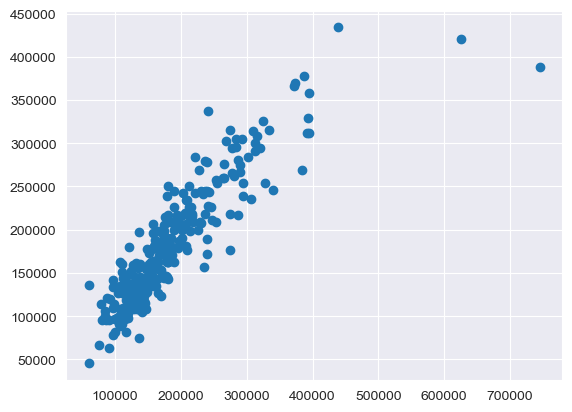

In [935]:
plt.scatter(y_test, y_pred)
plt.show()

In [936]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler


In [937]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = modeling_data.drop(columns=['SalePrice']).columns)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2)


In [938]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# recursive feature elimination
rfe = RFE(Ridge(alpha=100))
selector = rfe.fit(X_train, y_train)
print(f'Selected Features [{selector.n_features_}]:')
selector.get_feature_names_out().tolist()

Selected Features [126]:


['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'HouseAge',
 'IsRemodeled',
 'TotalBathrooms',
 'ExterQual_num',
 'BsmtQual_num',
 'KitchenQual_num',
 'GarageQual_num',
 'HeatingQC_num',
 'MSSubClass_160',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSZoning_RL',
 'Street_Pave',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neigh

In [939]:
selected_features = selector.get_feature_names_out().tolist()
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [940]:
lambdas = np.linspace(1000,0.0001,1000)
lambdas

array([1.00000000e+03, 9.98998999e+02, 9.97997998e+02, 9.96996997e+02,
       9.95995996e+02, 9.94994995e+02, 9.93993995e+02, 9.92992994e+02,
       9.91991993e+02, 9.90990992e+02, 9.89989991e+02, 9.88988990e+02,
       9.87987989e+02, 9.86986988e+02, 9.85985987e+02, 9.84984986e+02,
       9.83983986e+02, 9.82982985e+02, 9.81981984e+02, 9.80980983e+02,
       9.79979982e+02, 9.78978981e+02, 9.77977980e+02, 9.76976979e+02,
       9.75975978e+02, 9.74974977e+02, 9.73973977e+02, 9.72972976e+02,
       9.71971975e+02, 9.70970974e+02, 9.69969973e+02, 9.68968972e+02,
       9.67967971e+02, 9.66966970e+02, 9.65965969e+02, 9.64964968e+02,
       9.63963968e+02, 9.62962967e+02, 9.61961966e+02, 9.60960965e+02,
       9.59959964e+02, 9.58958963e+02, 9.57957962e+02, 9.56956961e+02,
       9.55955960e+02, 9.54954959e+02, 9.53953959e+02, 9.52952958e+02,
       9.51951957e+02, 9.50950956e+02, 9.49949955e+02, 9.48948954e+02,
       9.47947953e+02, 9.46946952e+02, 9.45945951e+02, 9.44944950e+02,
      

In [941]:
alphaCV = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error')
alphaCV.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+03, 9.98998999e+02, 9.97997998e+02, 9.96996997e+02,
       9.95995996e+02, 9.94994995e+02, 9.93993995e+02, 9.92992994e+02,
       9.91991993e+02, 9.90990992e+02, 9.89989991e+02, 9.88988990e+02,
       9.87987989e+02, 9.86986988e+02, 9.85985987e+02, 9.84984986e+02,
       9.83983986e+02, 9.82982985e+02, 9.81981984e+02, 9.80980983e+02,
       9.79979982e+02, 9.78978981e+0...
       2.30231207e+01, 2.20221198e+01, 2.10211189e+01, 2.00201180e+01,
       1.90191171e+01, 1.80181162e+01, 1.70171153e+01, 1.60161144e+01,
       1.50151135e+01, 1.40141126e+01, 1.30131117e+01, 1.20121108e+01,
       1.10111099e+01, 1.00101090e+01, 9.00910811e+00, 8.00810721e+00,
       7.00710631e+00, 6.00610541e+00, 5.00510450e+00, 4.00410360e+00,
       3.00310270e+00, 2.00210180e+00, 1.00110090e+00, 1.00000000e-04]),
        scoring='neg_mean_squared_error')

In [942]:
alphaCV.alpha_

406.4064657657658

In [943]:
ridge_model = Ridge(alpha= alphaCV.alpha_).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [944]:
r2 = ridge_model.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
results.loc[f'Ridge Regression [alpha = {alphaCV.alpha_}]'] = [r2, rmse]
results

,R2,RMSE
Multiple Linear Regression,0.787361,37270.511851
Ridge Regression [alpha = 406.4064657657658],0.860506,28754.473542


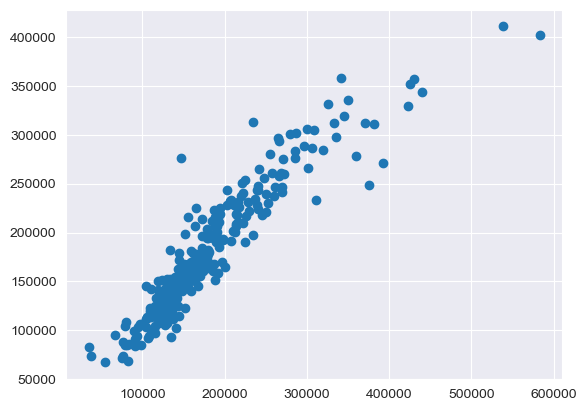

In [945]:
plt.scatter(y_test, y_pred)
plt.show()